In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
july = pd.read_csv('tomslee_airbnb_new_york_1438_2017-07-12.csv')
july = july.drop(['room_id','survey_id', 'host_id', 'country', 'city', 'bathrooms', 'minstay', 'last_modified', 'location'], 1)

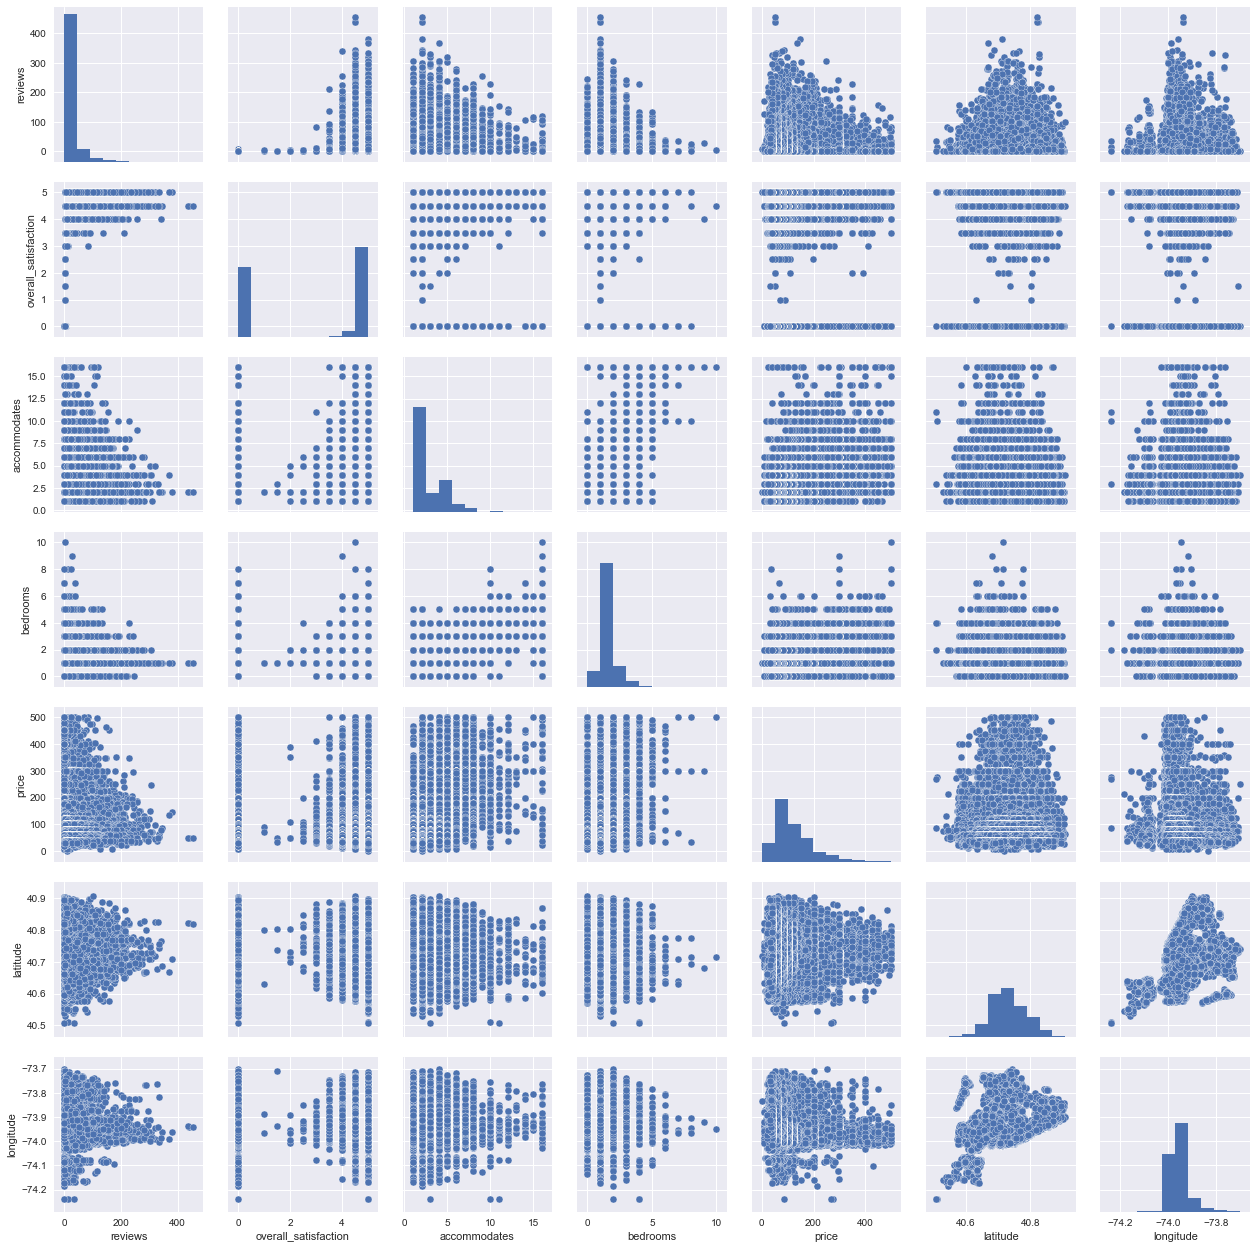

In [29]:
sns.pairplot(july[(july.price < 500) & (july.bedrooms < 50)])
plt.show()

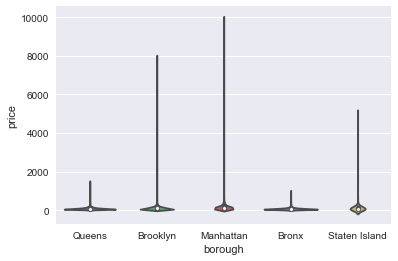

In [30]:
sns.violinplot(x='borough', y='price', data=july)
plt.show()
#need to get rid of these high-priced outliers

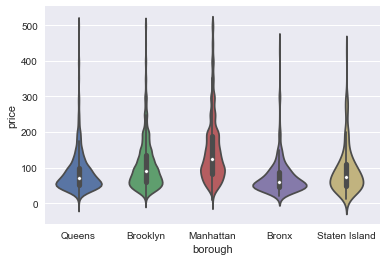

In [28]:
sns.violinplot(x='borough', y='price', data=july[july.price <= 500])
plt.show()
#looks like Harlem is counted as a neighborhood in Manhattan in this data set. 

In [34]:
july = july.drop('name', 1)
july_cats = pd.get_dummies(july, drop_first=True)

In [35]:
july_cats.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,room_type_Private room,room_type_Shared room,borough_Brooklyn,...,property_type_In-law,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Townhouse,property_type_Vacation home,property_type_Villa
0,6,5.0,4,1.0,85.0,40.749909,-73.876880,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,14,4.0,6,1.0,90.0,40.678527,-73.889584,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,4.5,6,1.0,239.0,40.583041,-73.957976,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,35,5.0,2,1.0,165.0,40.758374,-73.991955,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,2,1.0,159.0,40.761960,-73.959733,0,1,0,...,0,0,0,0,0,0,0,0,0,0


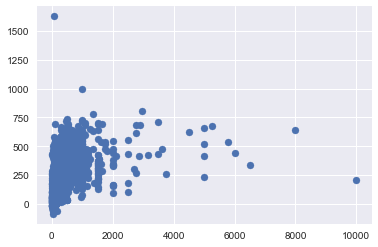

In [40]:
from sklearn.linear_model import LinearRegression
X = july_cats.drop('price', 1)
y = july.price

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X,y)
predicted_prices= lm.predict(X)

plt.scatter(x=y, y=predicted_prices)
plt.show()

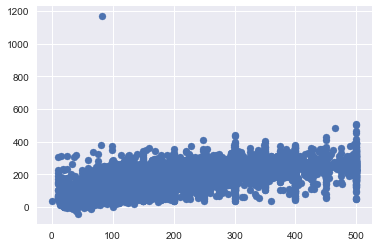

In [41]:
X = july_cats[july_cats.price <= 500].drop('price', 1)
y = july[july.price <= 500].price

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X,y)
predicted_prices= lm.predict(X)

plt.scatter(x=y, y=predicted_prices)
plt.show()